# Stopping Customers from Leaving
John is a little worrried that his team isn't doing his best to retain customers. Rather than just randomly deploying loyalty programs and techniques, he approaches you to see if there's a better way to predict which customers aren't happy. 

# 1. Import Data

In [1]:
!pip3 install pandas ydata-profiling ipywidgets


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip3 show ydata-profiling

Name: ydata-profiling
Version: 4.5.1
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: D:\Regression\regression\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [6]:
import pandas as pd

In [102]:
df = pd.read_csv('classificationdata.csv', index_col='id')

In [8]:
df.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,...,108,19.138302,208.349932,130,9.190181,8.015688,7,2.248902,7,no
1,MI,216,8.0,No,14.0,9.0,area_code_408,no,no,3,...,71,15.474436,228.902063,85,10.277852,9.683971,8,2.609739,3,no
2,NH,18,20.0,No,12.0,1.0,area_code_408,no,no,1,...,55,22.547297,202.353527,127,8.898488,14.039450,8,3.845776,2,no
3,MN,174,9.0,No,12.0,6.0,area_code_415,no,no,2,...,105,16.666506,214.487530,105,9.740333,13.031063,4,3.525823,1,no
4,TX,68,19.0,No,22.0,5.0,area_code_415,no,no,1,...,88,20.408969,190.047534,113,8.813303,6.760950,4,1.828652,0,no


In [9]:
df.tail()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
17238,NY,142,14.0,No,1.0,1.0,area_code_415,yes,no,2,...,125,14.191124,62.263008,89,2.872740,0.493638,0,0.250048,3,yes
17239,ID,93,8.0,No,9.0,7.0,area_code_415,yes,yes,29,...,134,23.784585,224.625284,95,10.627770,12.870274,6,3.370551,1,no
17240,TX,110,24.0,No,3.0,7.0,area_code_510,no,no,2,...,123,21.482982,146.474026,59,6.367553,14.037650,5,4.001911,4,no
17241,TN,8,10.0,No,3.0,10.0,area_code_415,no,no,1,...,83,24.633320,214.348043,88,9.179660,7.373555,2,1.921722,1,no
17242,VA,61,18.0,No,10.0,10.0,area_code_408,no,no,1,...,78,12.918930,203.770825,85,8.975769,7.166460,4,1.947350,0,no


# 2. Split Data to Prevent Snooping Bias

In [8]:
! pip3 install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.model_selection import train_test_split

In [103]:
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [12]:
X_temp = train.drop('churn', axis=1)

In [13]:
y_temp = train['churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1234) # stratify=y_temp

In [15]:
X_temp

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,226.325604,139,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,190.880950,124,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,235.124965,109,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,205.219041,91,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,153.221244,103,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,MS,145,10.0,No,5.0,6.0,area_code_510,no,no,1,...,195.327913,87,16.510144,177.148800,88,7.970189,10.761491,5,2.836673,1
9449,AL,30,NaN,NaN,NaN,NaN,area_code_510,no,no,0,...,189.881009,88,16.329474,155.550342,55,6.548421,6.774797,2,1.885143,0
8471,OH,165,15.0,No,16.0,10.0,area_code_510,no,no,2,...,198.727605,127,18.274905,198.142324,125,9.672272,8.795677,9,2.190617,1


In [16]:
train.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,139,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2,no
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,124,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1,yes
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,109,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0,no
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,91,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0,no
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,103,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2,no


In [17]:
test.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
15297,RI,75,13.0,No,3.0,9.0,area_code_408,no,no,1,...,63,22.235806,170.129673,97,7.657983,11.726601,6,3.208268,3,no
7075,MN,150,17.0,No,5.0,9.0,area_code_408,no,no,1,...,78,19.710988,203.025537,88,9.489277,8.740585,4,2.357105,1,no
3986,DC,151,NaN,NaN,NaN,NaN,area_code_415,no,no,1,...,135,19.994423,102.188757,107,4.476529,10.184403,5,2.968296,1,NaN
3733,TN,87,11.0,No,6.0,9.0,area_code_510,no,no,2,...,95,27.086560,191.994207,49,8.767864,9.074107,2,2.508948,1,no
10674,AR,110,9.0,No,19.0,6.0,area_code_408,no,no,1,...,116,9.441173,183.264682,90,8.452725,11.701778,3,2.986362,1,no


In [18]:
y_train

id
5108      no
287       no
4073      no
13747     no
3551      no
        ... 
4104     yes
15542     no
268       no
639       no
8338     yes
Name: churn, Length: 8449, dtype: object

# 3. Exploratory Data Analysis

## Birds Eye View

In [18]:
!pip3 install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from matplotlib import pyplot as plt

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12070 entries, 16692 to 1318
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_code                     12070 non-null  object 
 1   tenure                         12070 non-null  int64  
 2   contract_length                12041 non-null  float64
 3   promotions_offered             12041 non-null  object 
 4   remaining_term                 12041 non-null  float64
 5   last_nps_rating                12041 non-null  float64
 6   area_code                      12063 non-null  object 
 7   international_plan             12070 non-null  object 
 8   voice_mail_plan                12050 non-null  object 
 9   number_vmail_messages          12070 non-null  int64  
 10  total_day_minutes              12070 non-null  float64
 11  total_day_calls                12070 non-null  int64  
 12  total_day_charge               12070 non-nu

In [21]:
df.isnull().sum()

state_code                        0
tenure                            0
contract_length                  47
promotions_offered               47
remaining_term                   47
last_nps_rating                  47
area_code                        12
international_plan                0
voice_mail_plan                  30
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                18
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            47
dtype: int64

In [22]:
train.describe()

,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,12070.000000,12041.000000,12041.000000,12041.000000,12070.000000,12070.000000,12070.000000,12070.000000,12058.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000
mean,100.310771,15.924840,11.137115,6.102815,8.638608,179.821368,100.064374,30.574659,200.288303,100.416984,17.014347,199.546252,99.791881,8.979010,10.300118,4.961806,2.774743,1.555344
std,39.742023,4.904918,7.212212,2.723722,13.030305,54.694309,20.137844,9.301168,50.899001,19.898596,4.319807,50.871813,20.195931,2.285268,2.804826,2.508605,0.750105,1.317849
min,1.000000,8.000000,1.000000,1.000000,0.000000,1.383902,1.000000,0.119603,7.605489,1.000000,1.052621,4.247707,1.000000,0.472320,0.032252,0.000000,0.013478,0.000000
25%,73.000000,12.000000,5.000000,4.000000,1.000000,142.621175,87.000000,24.323777,166.719227,87.000000,14.152096,165.683627,86.000000,7.446210,8.529475,3.000000,2.299756,1.000000
50%,100.000000,16.000000,10.000000,7.000000,2.000000,179.705079,100.000000,30.517433,200.746807,101.000000,17.049083,198.635687,99.000000,8.952996,10.382980,5.000000,2.812103,1.000000
75%,127.000000,20.000000,17.000000,8.000000,16.000000,217.024361,113.000000,36.834662,233.943152,114.000000,19.870764,234.236992,114.000000,10.520554,12.066125,6.000000,3.256842,2.000000
max,238.000000,24.000000,24.000000,10.000000,52.000000,351.091823,165.000000,59.727092,357.739429,169.000000,30.474658,394.851052,173.000000,17.700351,19.981388,20.000000,5.398333,9.000000


In [23]:
train.describe(include='object')

,state_code,promotions_offered,area_code,international_plan,voice_mail_plan,churn
count,12070,12041,12063,12070,12050,12041
unique,51,3,3,2,2,2
top,WV,No,area_code_415,no,no,no
freq,398,10957,6049,10957,8887,10314


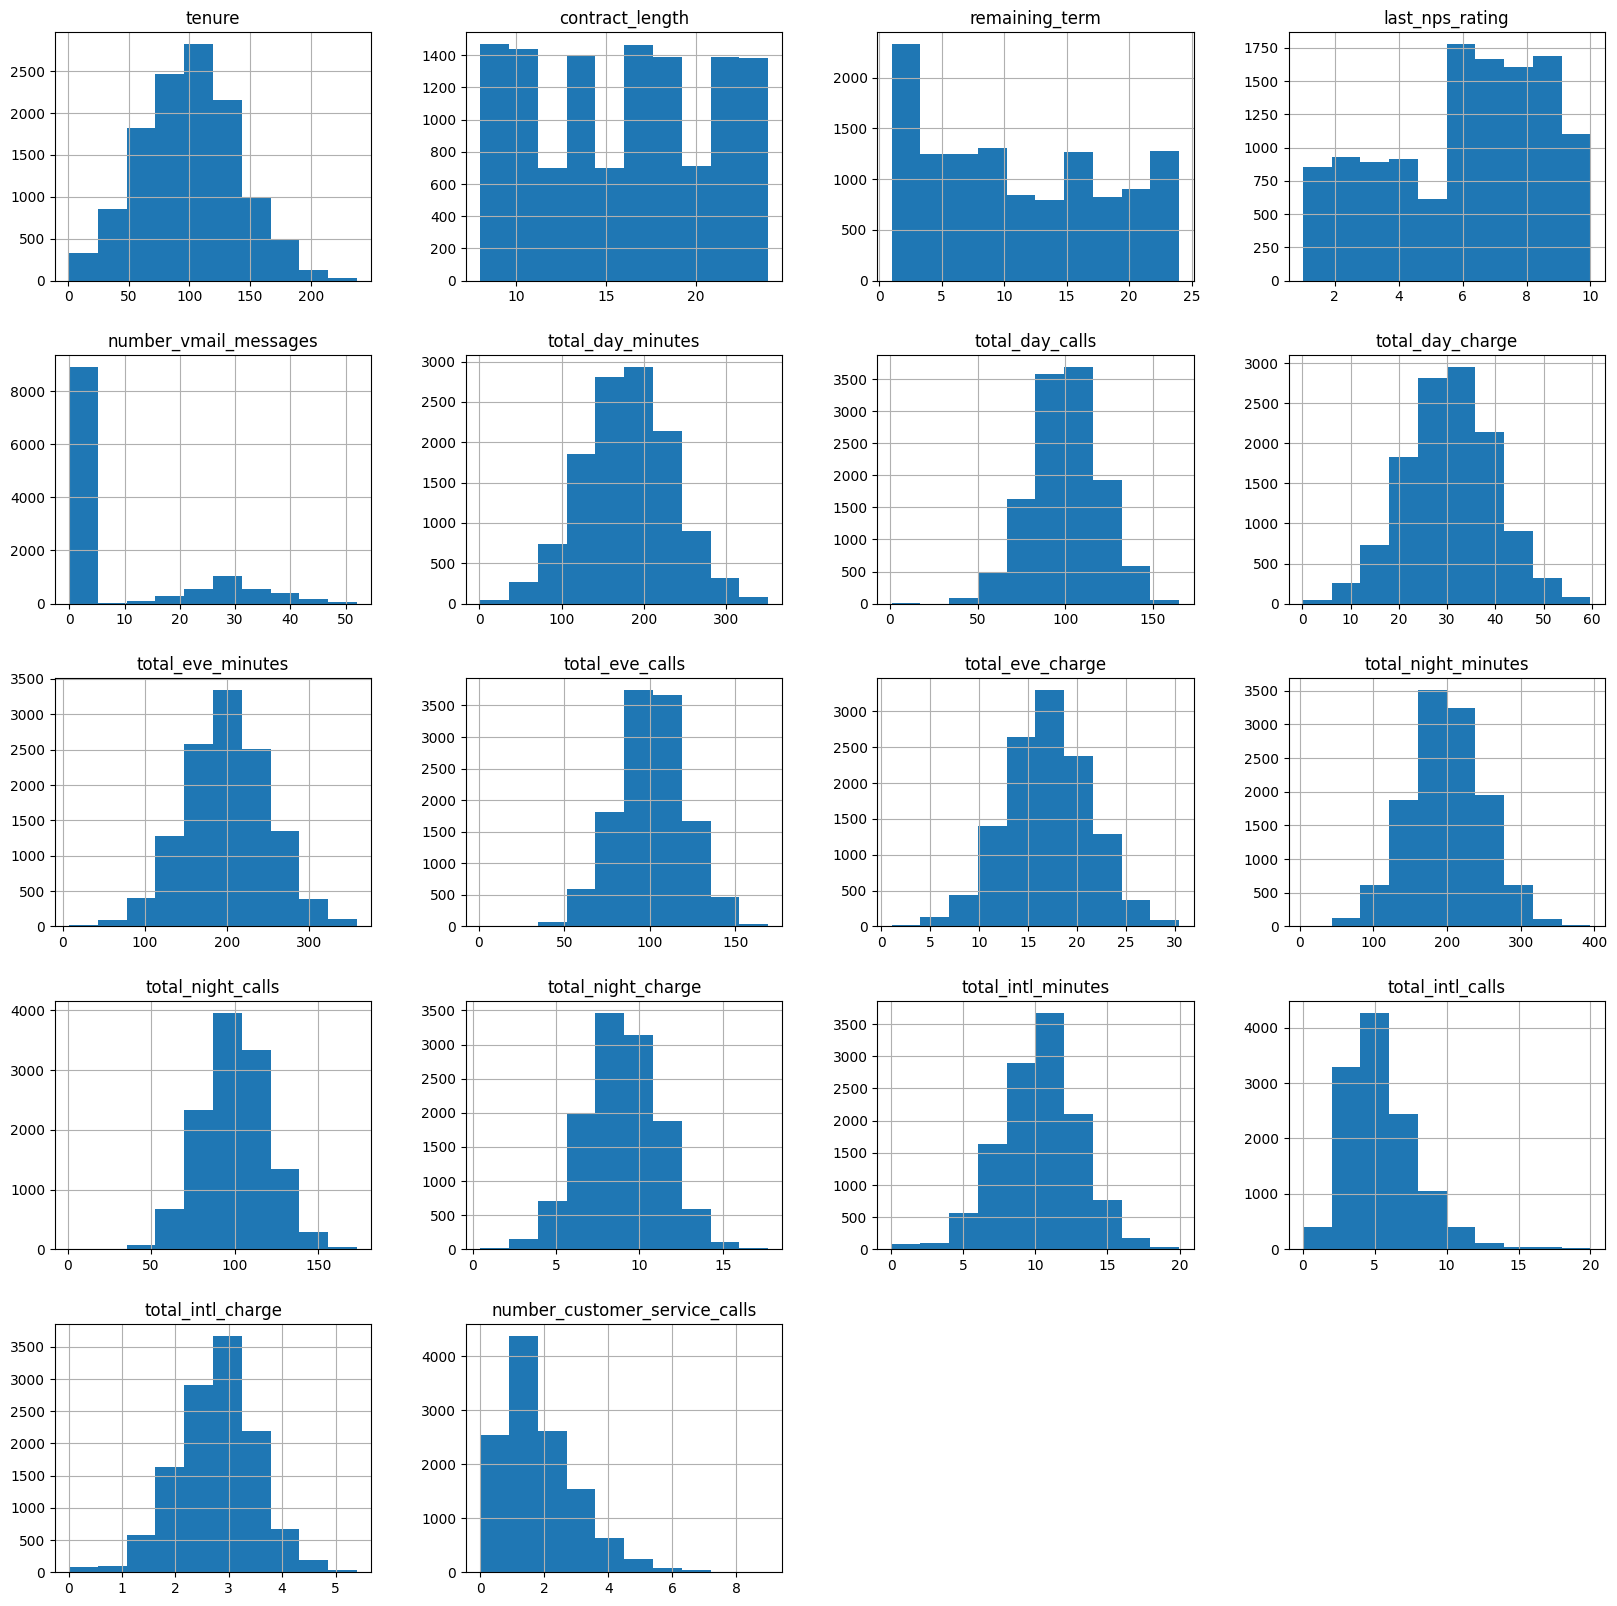

In [24]:
%matplotlib inline
train.hist(figsize=(20,20))
plt.show()

## Faster EDA with Pandas Profiling

In [26]:
!pip install -U ydata-profiling  


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from ydata_profiling import ProfileReport

In [29]:
profile = ProfileReport(train, title='Pandas Profiling Report')

In [2]:
# profile

In [ ]:
# profile.to_file('init_report.html')  # works on windows older version of anaconda

In [ ]:
#open init_report.html in browser

## Analyse Categorical Features

### Inspect Target Features

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
train.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,139,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2,no
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,124,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1,yes
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,109,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0,no
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,91,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0,no
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,103,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2,no


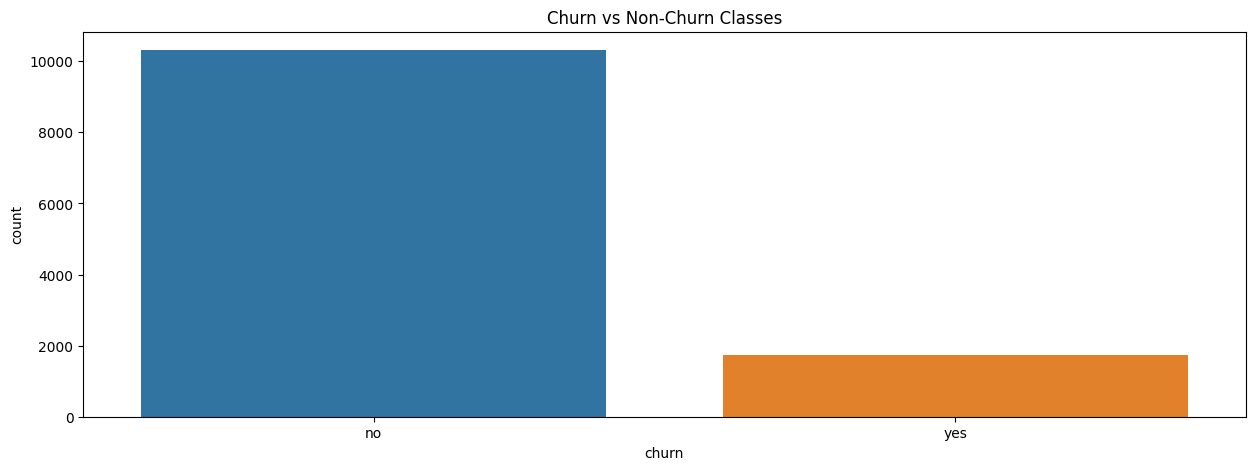

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='churn', data=train).set_title('Churn vs Non-Churn Classes')
plt.show()

### Inspect State, Area Code and Promotions Offered

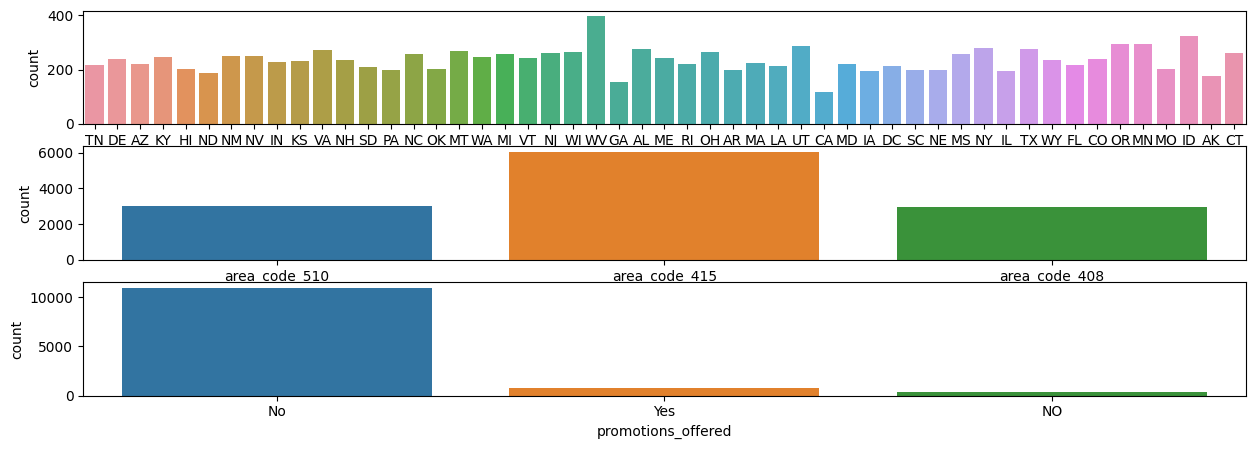

In [34]:
# Plotting out multiple plots in the same canvas

fig, axs = plt.subplots(3, figsize=(15,5))
sns.countplot(data=train, x='state_code', ax=axs[0])
sns.countplot(data=train, x='promotions_offered', ax=axs[2])
sns.countplot(data=train, x='area_code', ax=axs[1])
plt.show()

In [35]:
# save figure to disc
fig.get_figure().savefig('object_count_plot.png')

## Analyse Numeric Features

### Inspect Vmail messages and Customer Service Calls

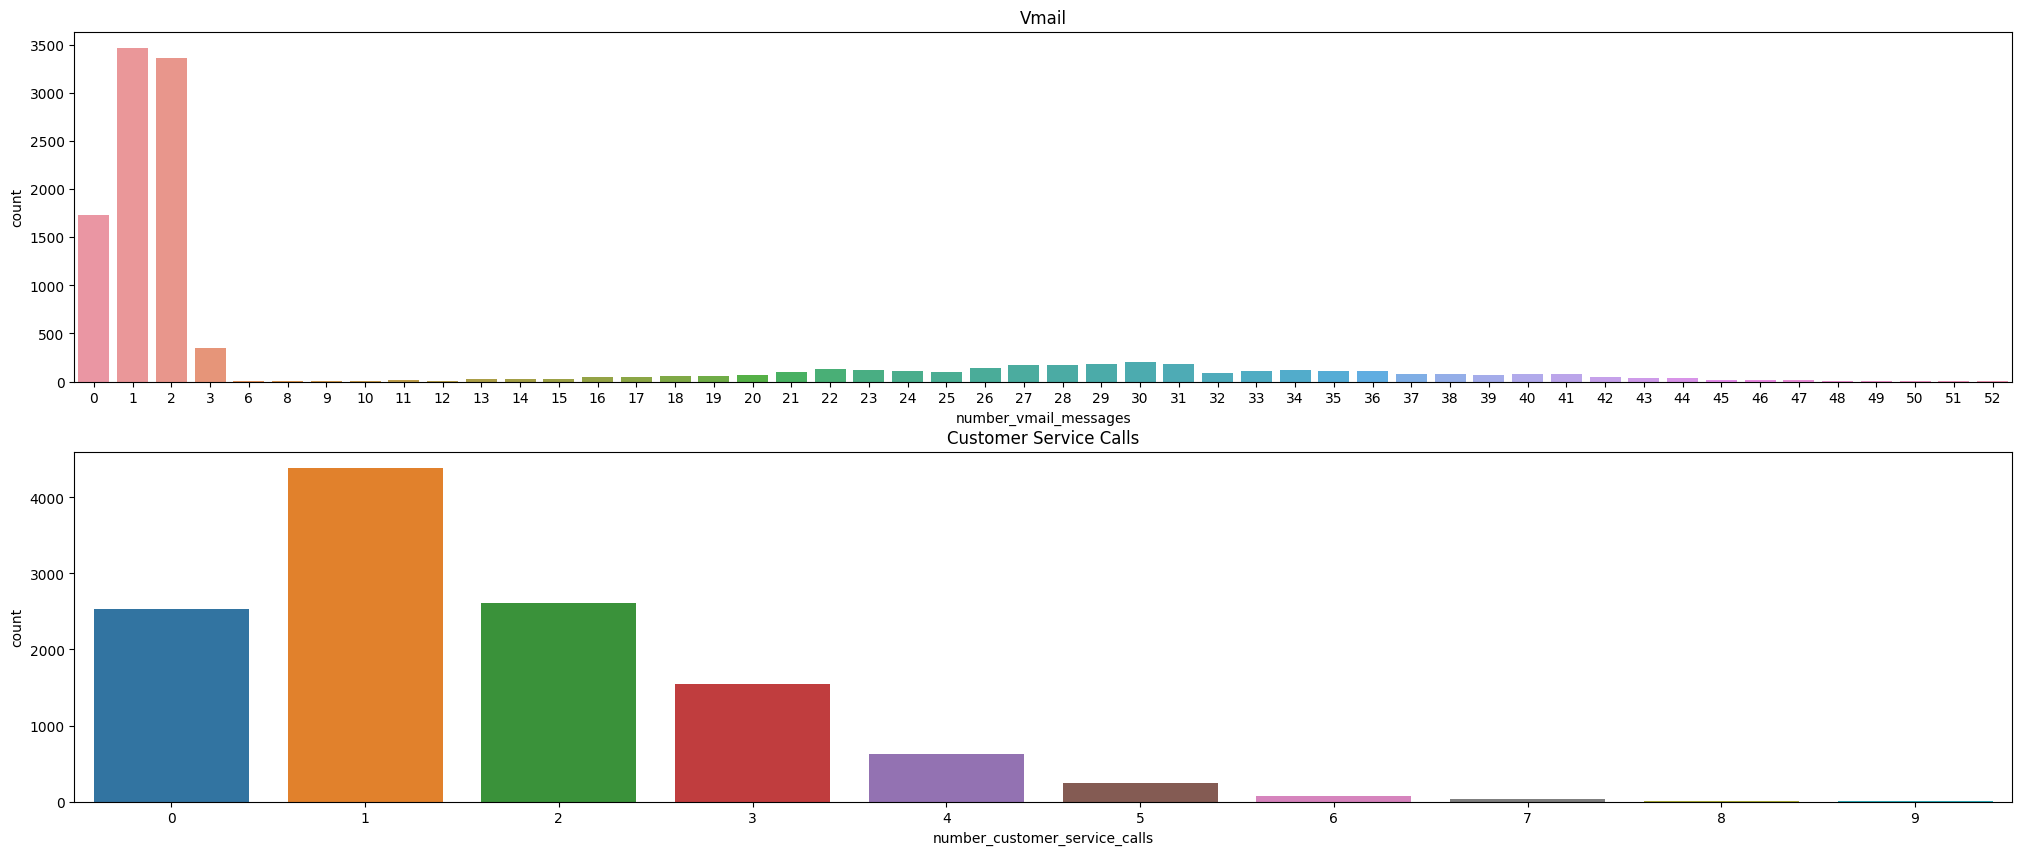

In [43]:
fig1, axs1 = plt.subplots(2, figsize=(25,10))
sns.countplot(data=train, x='number_vmail_messages', ax=axs1[0]).set_title('Vmail')
sns.countplot(data=train, x='number_customer_service_calls', ax=axs1[1]).set_title('Customer Service Calls')
plt.show()

In [44]:
fig1.get_figure().savefig('vmail_vs_cust_service_calls.png')

### Analyse Customer Service Calls given it's Skewed

In [45]:
import numpy as np

In [46]:
train['number_customer_service_calls'].skew()

1.086776733503893

In [47]:
train['log_customer_service_calls'] = np.log(train['number_customer_service_calls']+1)

In [49]:
train['log_customer_service_calls'].skew()

-0.11828354478767099

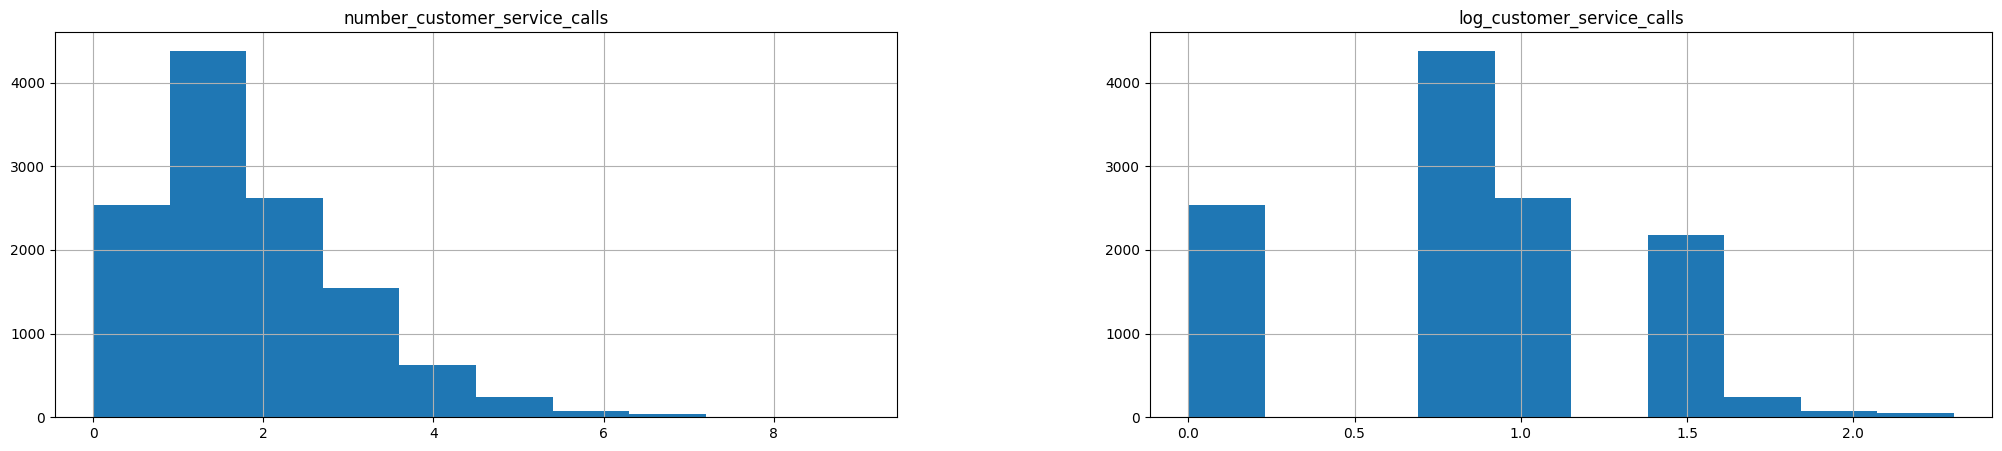

In [50]:
train[['number_customer_service_calls', 'log_customer_service_calls']].hist(figsize=(25,5))
plt.show()

In [52]:
train = train.drop('log_customer_service_calls', axis=1)

In [53]:
train.dtypes

state_code                        object
tenure                             int64
contract_length                  float64
promotions_offered                object
remaining_term                   float64
last_nps_rating                  float64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## Analyse Relationships

### Look into Numeric/Numeric Correlation

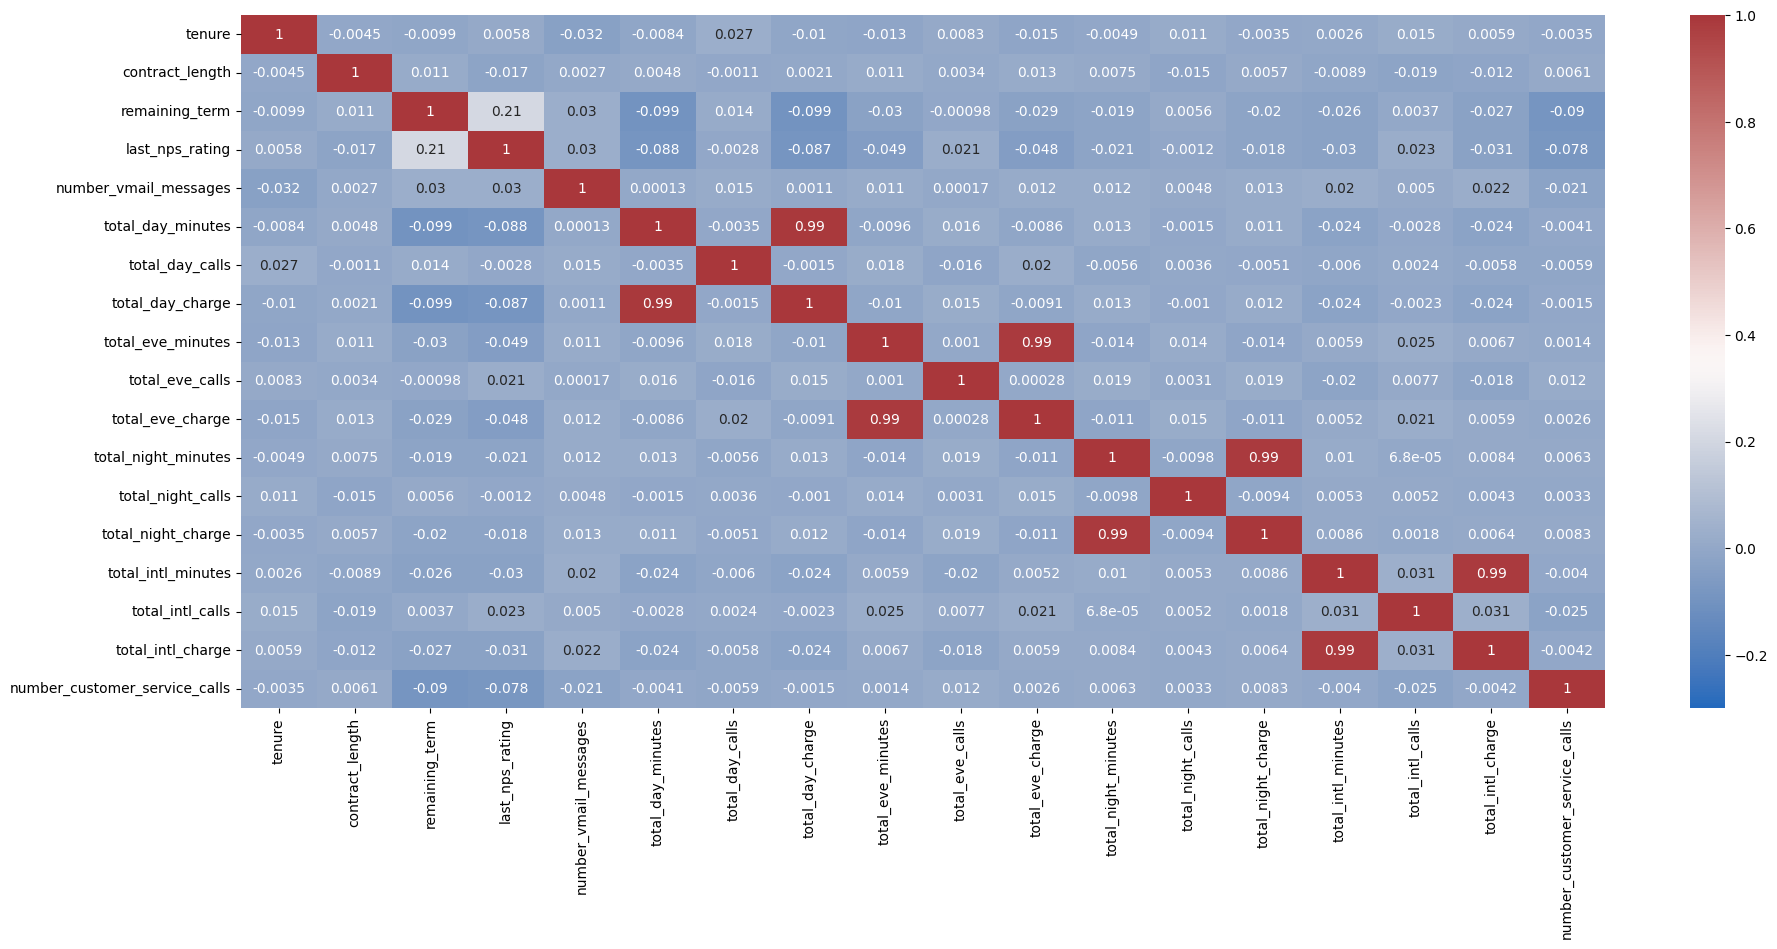

In [66]:
plt.figure(figsize=(22,9))
sns.heatmap(train.select_dtypes(exclude='object').corr(),vmin=-0.3, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.show()

In [68]:
temp = train.copy()
temp['churn'] = temp['churn'].apply(lambda x: 1 if x=='yes' else 0)

In [70]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12070 entries, 16692 to 1318
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_code                     12070 non-null  object 
 1   tenure                         12070 non-null  int64  
 2   contract_length                12041 non-null  float64
 3   promotions_offered             12041 non-null  object 
 4   remaining_term                 12041 non-null  float64
 5   last_nps_rating                12041 non-null  float64
 6   area_code                      12063 non-null  object 
 7   international_plan             12070 non-null  object 
 8   voice_mail_plan                12050 non-null  object 
 9   number_vmail_messages          12070 non-null  int64  
 10  total_day_minutes              12070 non-null  float64
 11  total_day_calls                12070 non-null  int64  
 12  total_day_charge               12070 non-nu

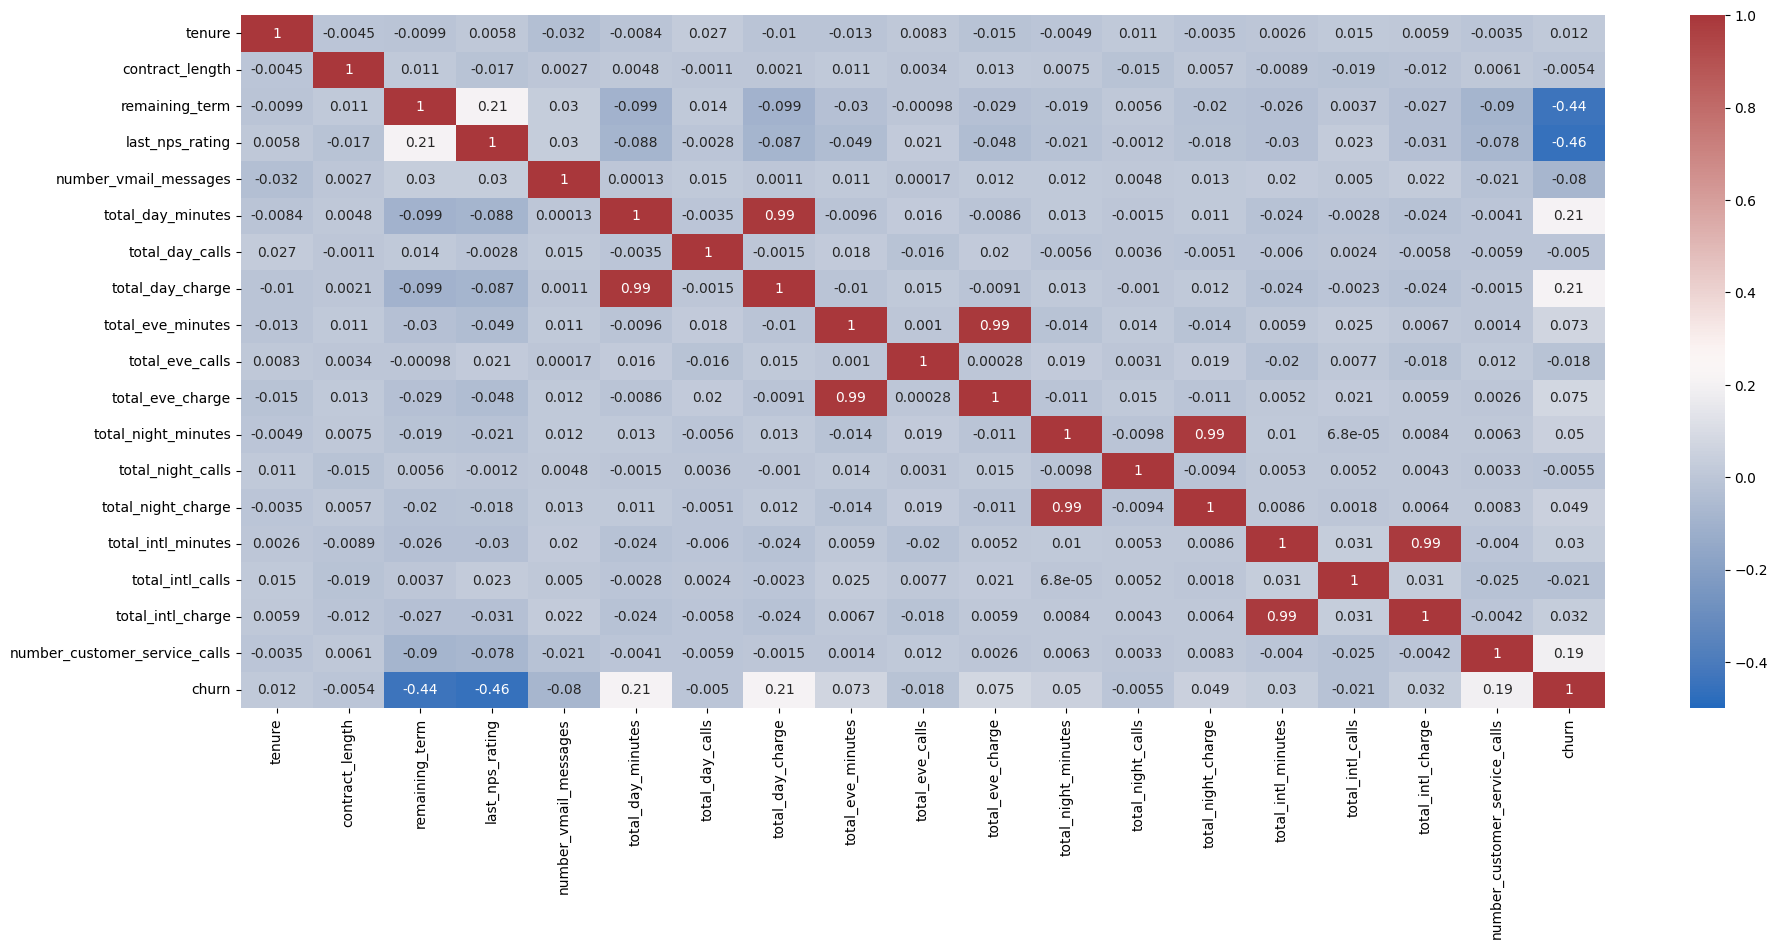

In [72]:
plt.figure(figsize=(22,9))
sns.heatmap(temp.select_dtypes(exclude='object').corr(),vmin=-0.5, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.show()

### Plot Churn Distributions

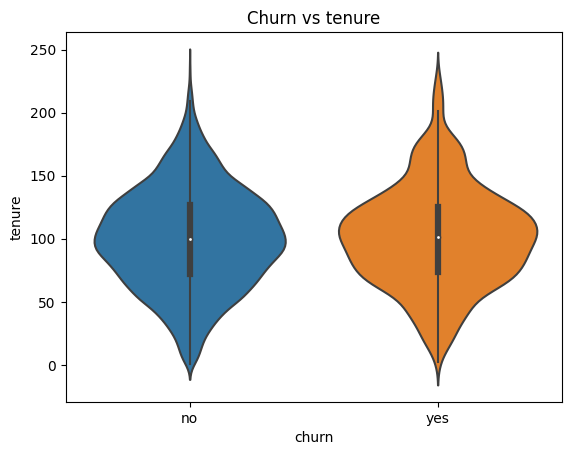

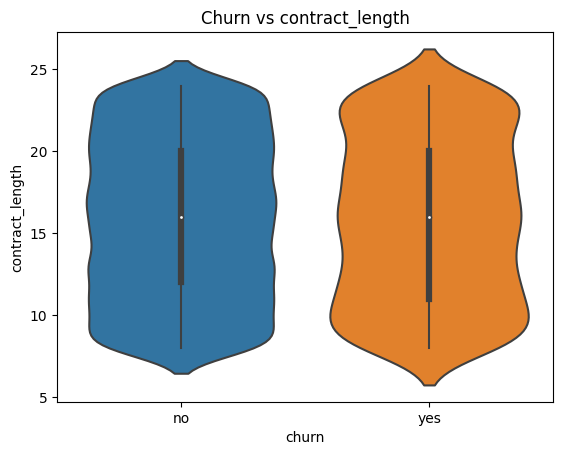

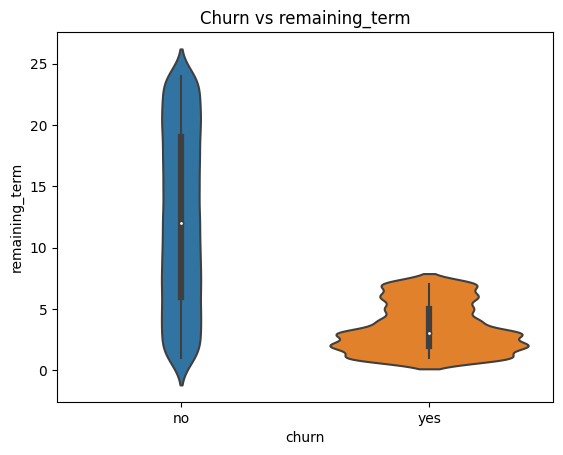

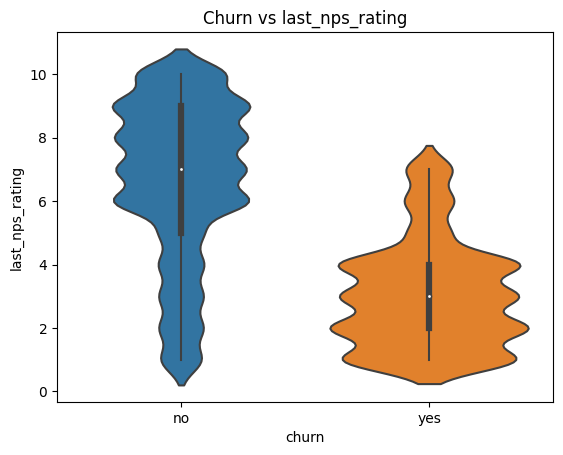

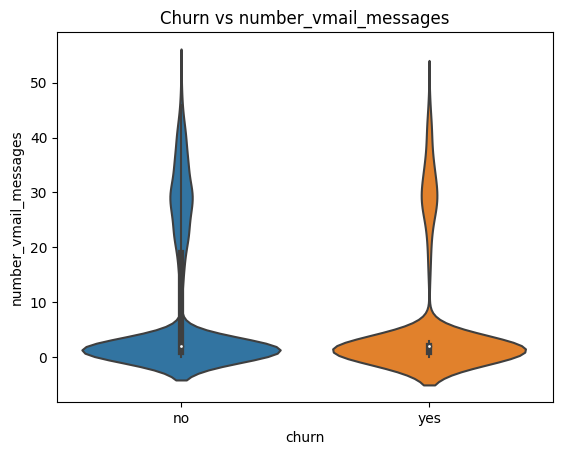

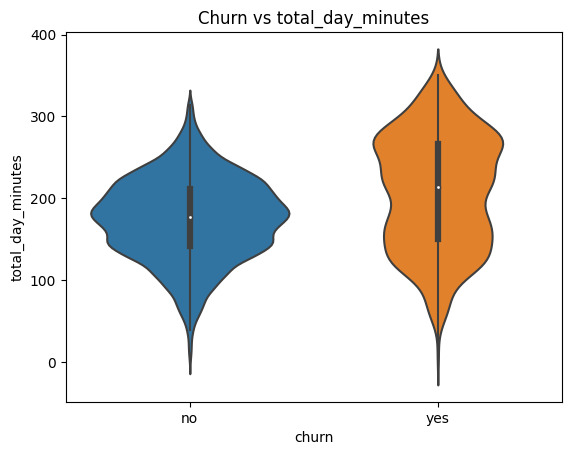

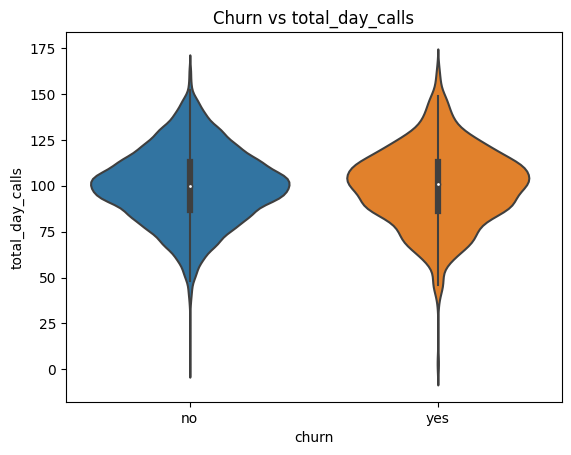

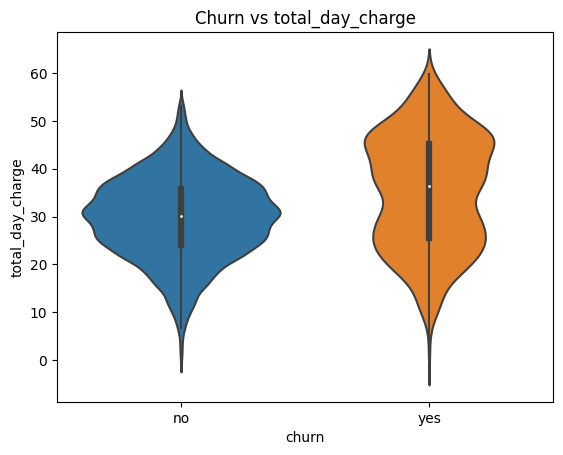

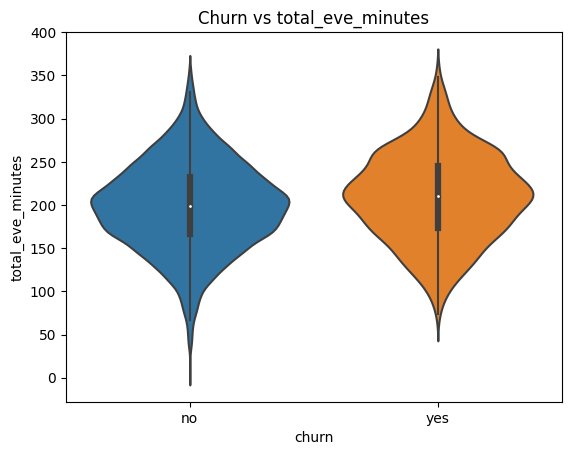

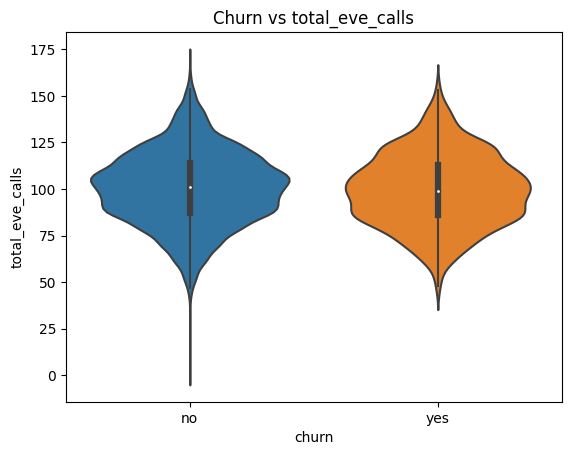

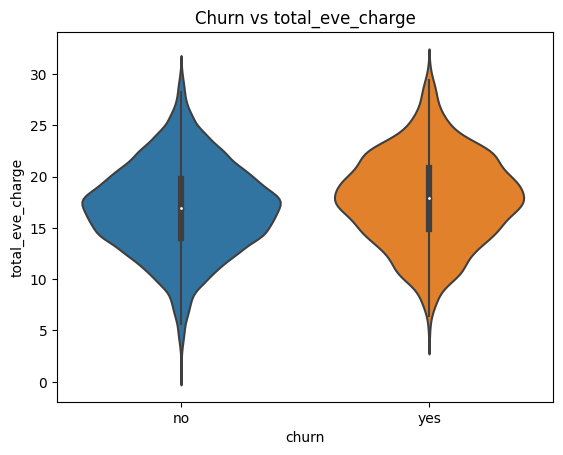

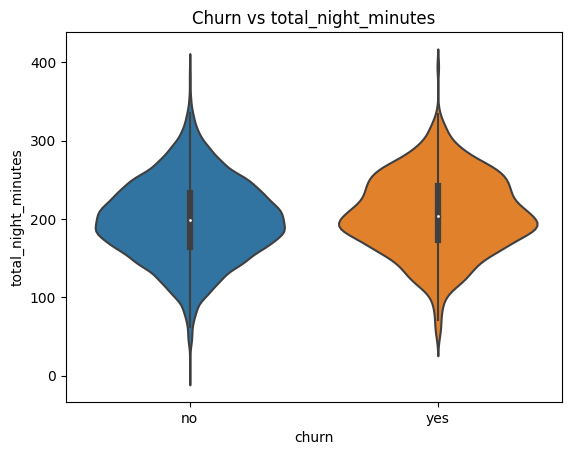

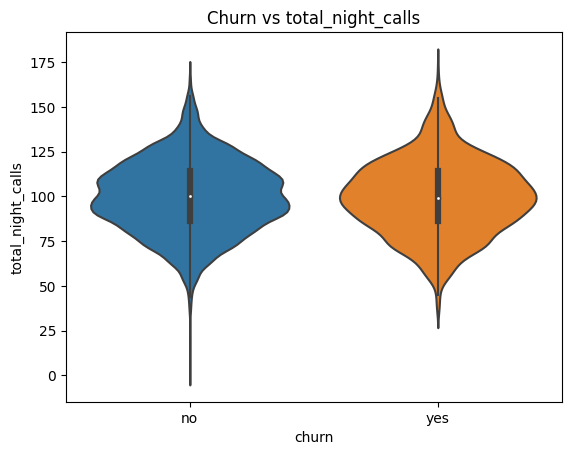

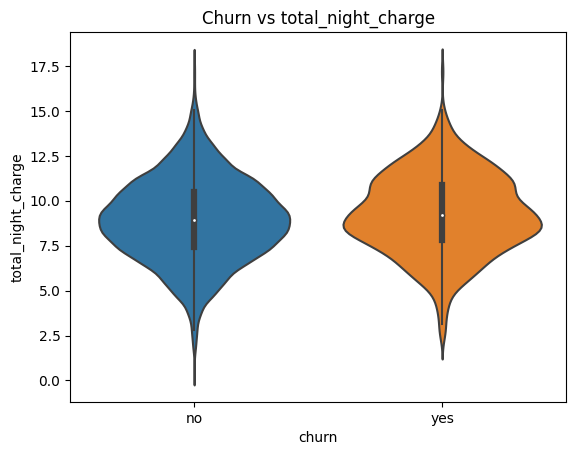

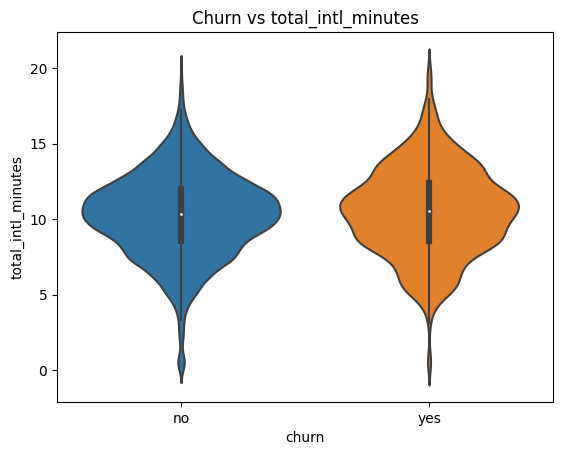

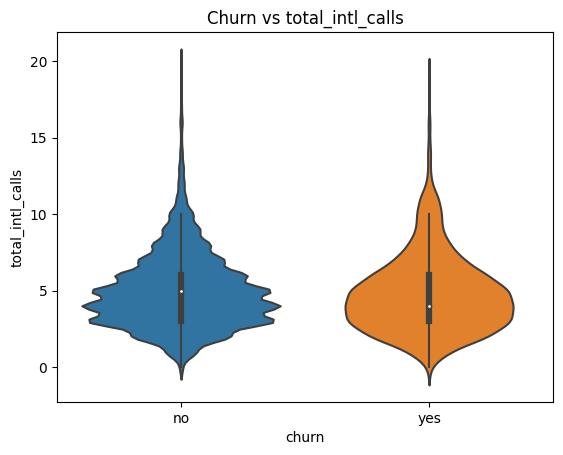

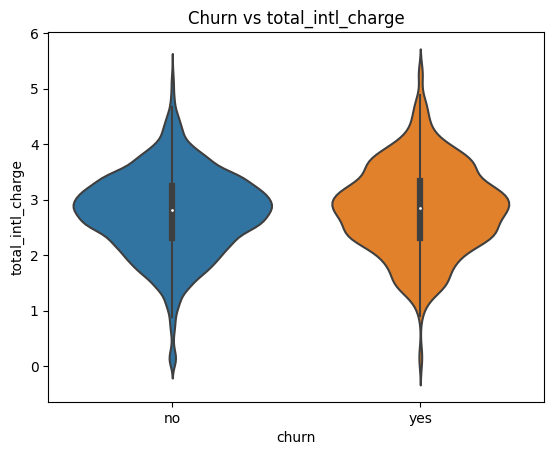

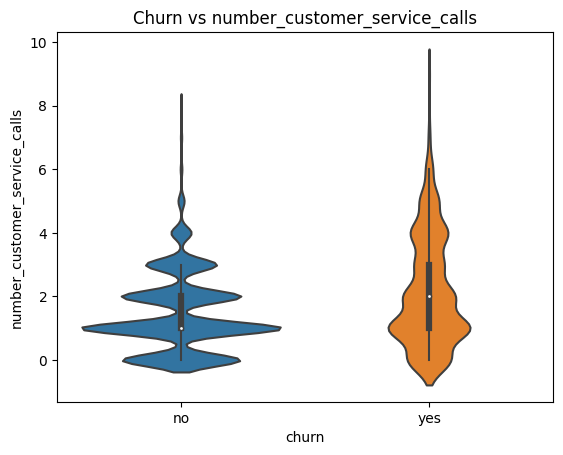

In [74]:
for col in train.select_dtypes(exclude='object').columns:
    sns.violinplot(x='churn', y=col, data=train).set_title(f'Churn vs {col}')
    plt.show()

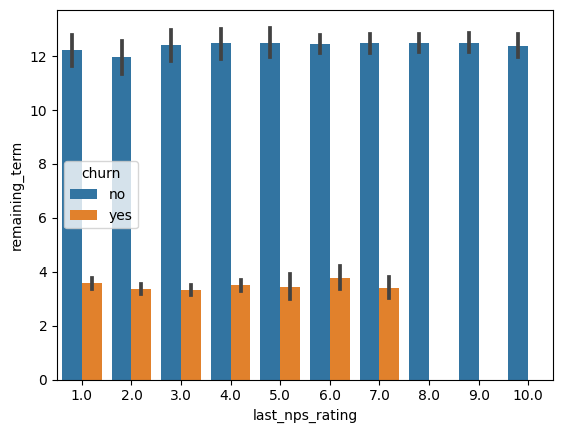

In [76]:
sns.barplot(x='last_nps_rating', y='remaining_term', hue='churn', data=train)
plt.show()

### What about Categorical Relationships to Churn

In [104]:
train['promotions_offered'] = train['promotions_offered'].replace(['NO', np.NaN], 'No')

In [84]:
pivot_feature = 'promotions_offered'
pd.crosstab(train[pivot_feature], train['churn']) / len(train)

churn,no,yes
promotions_offered,,
No,0.822038,0.115659
Yes,0.032477,0.027423


In [85]:
train.select_dtypes(include='object').columns

Index(['state_code', 'promotions_offered', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn'],
      dtype='object')

In [87]:
# loop thru and create a crosstab (pivot table) for all categorical features
for col in train.select_dtypes(include='object').columns:
    if col != 'churn':
        display(pd.crosstab(train[col], train['churn']) / len(train))

churn,no,yes
state_code,,
AK,0.013670,0.000829
AL,0.019553,0.002900
AR,0.014167,0.002403
AZ,0.016321,0.001657
CA,0.007539,0.002237
CO,0.017647,0.002237
CT,0.018558,0.003231
DC,0.014250,0.003065
DE,0.016239,0.003480


churn,no,yes
promotions_offered,,
No,0.822038,0.115659
Yes,0.032477,0.027423


churn,no,yes
area_code,,
area_code_408,0.210025,0.036205
area_code_415,0.430655,0.069097
area_code_510,0.213256,0.037780


churn,no,yes
international_plan,,
no,0.796935,0.108451
yes,0.057581,0.034631


churn,no,yes
voice_mail_plan,,
no,0.616321,0.118973
yes,0.237117,0.023529


### Is there a relationship between Remaining term and NPS Rating? And...promotions offered?
Namely when Remaining term < 5 and Last nps rating < 7

In [105]:
train['nps_less_7'] = (train['last_nps_rating'] <= 7).astype(int)
train['remaining_term_less_5'] = (train['remaining_term'] < 5).astype(int)
train['churn_yes'] = train['churn'].apply(lambda x: 1 if x=='yes' else 0)
train['churn_no'] = train['churn'].apply(lambda x: 1 if x=='no' else 0)

In [108]:
train.groupby(['nps_less_7', 'remaining_term_less_5','promotions_offered']).sum(['churn_yes', 'churn_no'])[['churn_yes', 'churn_no']] / len(train)

churn_yes  churn_no
nps_less_7 remaining_term_less_5 promotions_offered                     
0          0                     No                   0.000000  0.302817
           1                     No                   0.000000  0.061392
1          0                     No                   0.035543  0.405468
                                 Yes                  0.007788  0.000000
           1                     No                   0.080116  0.052361
                                 Yes                  0.019635  0.032477

In [109]:
train.drop(['nps_less_7','remaining_term_less_5', 'churn_yes','churn_no'], axis=1, inplace=True)

In [110]:
train

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,139,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2,no
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,124,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1,yes
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,109,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0,no
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,91,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0,no
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,103,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,MS,145,10.0,No,5.0,6.0,area_code_510,no,no,1,...,87,16.510144,177.148800,88,7.970189,10.761491,5,2.836673,1,no
9449,AL,30,NaN,No,NaN,NaN,area_code_510,no,no,0,...,88,16.329474,155.550342,55,6.548421,6.774797,2,1.885143,0,NaN
8471,OH,165,15.0,No,16.0,10.0,area_code_510,no,no,2,...,127,18.274905,198.142324,125,9.672272,8.795677,9,2.190617,1,no


# 4. Data Preprocessing

## Double check we're operating with a clean slate

In [112]:
train.columns

Index(['state_code', 'tenure', 'contract_length', 'promotions_offered',
       'remaining_term', 'last_nps_rating', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [113]:
df.columns

Index(['state_code', 'tenure', 'contract_length', 'promotions_offered',
       'remaining_term', 'last_nps_rating', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [111]:
[col in df.columns for col in train.columns]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

## Missing Area Code Data - Categorical

In [114]:
train.isnull().sum()

state_code                        0
tenure                            0
contract_length                  29
promotions_offered                0
remaining_term                   29
last_nps_rating                  29
area_code                         7
international_plan                0
voice_mail_plan                  20
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                12
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
dtype: int64

In [116]:
train[train['area_code'].isnull()]

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
17168,WY,54,18.0,No,19.0,7.0,NaN,no,NaN,40,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
4558,WY,58,22.0,No,20.0,6.0,NaN,no,NaN,41,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
13336,RI,79,13.0,No,9.0,6.0,NaN,no,no,2,...,68,14.943610,162.052384,106,7.171747,13.576263,6,3.658442,1,no
5772,MO,155,12.0,No,3.0,9.0,NaN,yes,no,0,...,98,8.018185,200.103367,96,9.318969,7.688405,7,1.940647,0,no
1642,MO,154,15.0,No,2.0,7.0,NaN,yes,no,1,...,100,8.753738,198.839157,94,9.278937,7.073209,6,1.943637,0,no
16450,FL,147,16.0,No,9.0,8.0,NaN,yes,no,1,...,93,20.838636,187.249514,66,8.307897,8.289207,5,2.255682,2,no
12972,MO,153,24.0,No,13.0,6.0,NaN,yes,no,0,...,98,8.515226,207.015705,92,9.090795,7.466579,6,2.008288,0,no


In [119]:
train['area_code'] = train['area_code'].fillna('missing')
train[train['area_code'] == 'missing']

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
17168,WY,54,18.0,No,19.0,7.0,missing,no,NaN,40,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
4558,WY,58,22.0,No,20.0,6.0,missing,no,NaN,41,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
13336,RI,79,13.0,No,9.0,6.0,missing,no,no,2,...,68,14.943610,162.052384,106,7.171747,13.576263,6,3.658442,1,no
5772,MO,155,12.0,No,3.0,9.0,missing,yes,no,0,...,98,8.018185,200.103367,96,9.318969,7.688405,7,1.940647,0,no
1642,MO,154,15.0,No,2.0,7.0,missing,yes,no,1,...,100,8.753738,198.839157,94,9.278937,7.073209,6,1.943637,0,no
16450,FL,147,16.0,No,9.0,8.0,missing,yes,no,1,...,93,20.838636,187.249514,66,8.307897,8.289207,5,2.255682,2,no
12972,MO,153,24.0,No,13.0,6.0,missing,yes,no,0,...,98,8.515226,207.015705,92,9.090795,7.466579,6,2.008288,0,no


In [120]:
train.isnull().sum()

state_code                        0
tenure                            0
contract_length                  29
promotions_offered                0
remaining_term                   29
last_nps_rating                  29
area_code                         0
international_plan                0
voice_mail_plan                  20
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                12
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
dtype: int64

## Missing Voice Mail Plan - Categorical

In [122]:
train['voice_mail_plan'] = train['voice_mail_plan'].fillna('missing')
train[train['voice_mail_plan']=='missing']

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
16429,HI,44,21.0,No,20.0,10.0,area_code_510,no,missing,1,...,102,18.016167,187.208784,90,8.690546,11.481874,2,3.017702,1,no
10372,HI,42,8.0,No,7.0,6.0,area_code_510,no,missing,2,...,106,17.749234,185.584080,92,8.224325,11.041335,2,3.105547,1,no
11974,MO,15,14.0,No,17.0,9.0,area_code_510,no,missing,1,...,69,11.871465,145.341081,102,7.051341,8.259750,9,2.296696,1,no
3365,MO,18,22.0,No,12.0,2.0,area_code_415,no,missing,2,...,77,22.896967,178.095650,103,8.785522,6.028258,6,1.874301,0,no
17168,WY,54,18.0,No,19.0,7.0,missing,no,missing,40,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
7767,AZ,4,9.0,No,7.0,3.0,area_code_408,no,missing,0,...,119,21.481234,281.874501,91,12.695069,11.408316,4,3.225750,1,yes
16037,AZ,6,16.0,No,3.0,2.0,area_code_408,no,missing,2,...,122,22.108010,288.967333,88,13.270796,11.430051,3,3.059472,1,yes
4558,WY,58,22.0,No,20.0,6.0,missing,no,missing,41,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
8645,MT,60,17.0,Yes,1.0,4.0,area_code_415,no,missing,1,...,75,19.991544,180.150988,108,8.345667,9.549767,3,2.468519,1,yes


## Missing Evening Minutes - Numeric

In [128]:
train[train['total_eve_minutes'].isnull()][['total_eve_minutes','churn']]

,total_eve_minutes,churn
id,,
16142,NaN,no
17168,NaN,no
4558,NaN,no
11193,NaN,yes
15828,NaN,no
12703,NaN,yes
2729,NaN,no
11475,NaN,no
15905,NaN,no


In [129]:
mean_eve_mins = train['total_eve_minutes'].mean().round(2)
mean_eve_mins

200.29

In [130]:
train['total_eve_minutes_missing'] = train['total_eve_minutes'].isnull().astype(int)
train['total_eve_minutes'] = train['total_eve_minutes'].fillna(mean_eve_mins)

In [131]:
train[train['total_eve_minutes_missing']==1][['total_eve_minutes_missing', 'total_eve_minutes']]

,total_eve_minutes_missing,total_eve_minutes
id,,
16142,1,200.29
17168,1,200.29
4558,1,200.29
11193,1,200.29
15828,1,200.29
12703,1,200.29
2729,1,200.29
11475,1,200.29
15905,1,200.29


## Missing Target Variables

In [132]:
train.isnull().sum()

state_code                        0
tenure                            0
contract_length                  29
promotions_offered                0
remaining_term                   29
last_nps_rating                  29
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 0
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
total_eve_minutes_missing         0
dtype: int64

In [134]:
train[train['churn'].isnull()][['contract_length','remaining_term','last_nps_rating','churn']]

,contract_length,remaining_term,last_nps_rating,churn
id,,,,
16332,NaN,NaN,NaN,NaN
7783,NaN,NaN,NaN,NaN
5127,NaN,NaN,NaN,NaN
14246,NaN,NaN,NaN,NaN
1612,NaN,NaN,NaN,NaN
2332,NaN,NaN,NaN,NaN
3544,NaN,NaN,NaN,NaN
5704,NaN,NaN,NaN,NaN
12038,NaN,NaN,NaN,NaN


In [137]:
train = train[~train['churn'].isnull()]

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12041 entries, 16692 to 1318
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_code                     12041 non-null  object 
 1   tenure                         12041 non-null  int64  
 2   contract_length                12041 non-null  float64
 3   promotions_offered             12041 non-null  object 
 4   remaining_term                 12041 non-null  float64
 5   last_nps_rating                12041 non-null  float64
 6   area_code                      12041 non-null  object 
 7   international_plan             12041 non-null  object 
 8   voice_mail_plan                12041 non-null  object 
 9   number_vmail_messages          12041 non-null  int64  
 10  total_day_calls                12041 non-null  int64  
 11  total_eve_calls                12041 non-null  int64  
 12  total_night_calls              12041 non-nu

# 5. Feature Engineering

## Ratio for Correlated Predictor Variables

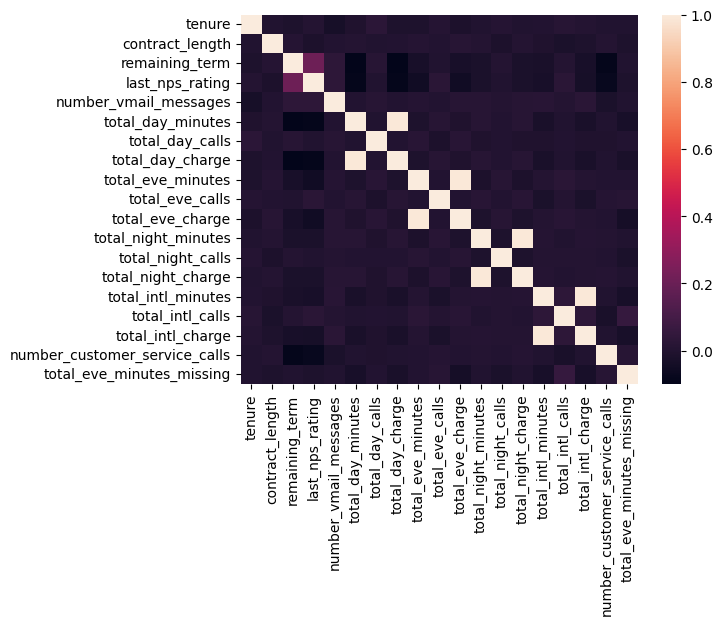

In [140]:
sns.heatmap(train.select_dtypes(exclude='object').corr())
plt.show()

In [142]:
# create ratios
train['day_ratio'] = train['total_day_charge'] / train['total_day_minutes']
train['eve_ratio'] = train['total_eve_charge'] / train['total_eve_minutes']
train['night_ratio'] = train['total_night_charge'] / train['total_night_minutes']
train['intl_ratio'] = train['total_intl_charge'] / train['total_intl_minutes']

/var/folders/xy/z950zcv53kn7fmy0fzz973l00000gn/T/ipykernel_19889/910961881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_ratio'] = train['total_day_charge'] / train['total_day_minutes']
/var/folders/xy/z950zcv53kn7fmy0fzz973l00000gn/T/ipykernel_19889/910961881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['eve_ratio'] = train['total_eve_charge'] / train['total_eve_minutes']
/var/folders/xy/z950zcv53kn7fmy0fzz973l00000gn/T/ipykernel_19889/910961881.py:4: SettingWithCopyWarning: 


In [143]:
train.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,8.308312,9,2.208759,2,no,0,0.172815,0.083632,0.043008,0.265849
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,8.238645,2,2.168779,1,yes,0,0.169215,0.084485,0.045763,0.263245
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,11.084169,5,3.153671,0,no,0,0.158396,0.088938,0.046510,0.284520
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,19.981388,4,5.242569,0,no,0,0.178475,0.086951,0.043587,0.262373
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,11.670808,9,3.205746,2,no,0,0.168656,0.081817,0.043780,0.274681


In [145]:
train = train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge',
            'total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

In [146]:
train.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio
id,,,,,,,,,,,,,,,,,,,,,
16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,2,...,139,70,9,2,no,0,0.172815,0.083632,0.043008,0.265849
6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,0,...,124,89,2,1,yes,0,0.169215,0.084485,0.045763,0.263245
9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,20,...,109,87,5,0,no,0,0.158396,0.088938,0.046510,0.284520
16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,1,...,91,91,4,0,no,0,0.178475,0.086951,0.043587,0.262373
8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,0,...,103,130,9,2,no,0,0.168656,0.081817,0.043780,0.274681


## Skewed Customer Service Calls

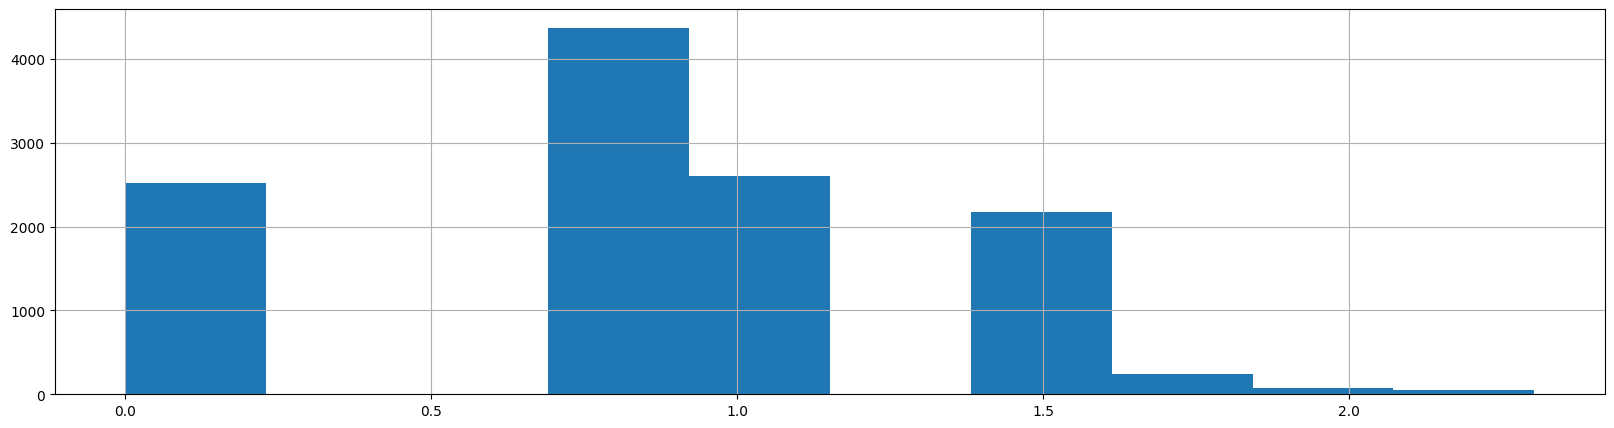

In [147]:
train['number_customer_service_calls'] = np.log(train['number_customer_service_calls']+1)
train['number_customer_service_calls'].hist(figsize=(20,5))
plt.show()

## Feature Engineering Unhappy Customers

In [148]:
train['promotions_offered'] = train['promotions_offered'].replace(['NO',np.NaN], 'No')

In [150]:
train.isnull().sum()

state_code                       0
tenure                           0
contract_length                  0
promotions_offered               0
remaining_term                   0
last_nps_rating                  0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_calls                  0
total_eve_calls                  0
total_night_calls                0
total_intl_calls                 0
number_customer_service_calls    0
churn                            0
total_eve_minutes_missing        0
day_ratio                        0
eve_ratio                        0
night_ratio                      0
intl_ratio                       0
dtype: int64

In [151]:
train['unhappy_customers'] = ((train.remaining_term < 5) & (train.last_nps_rating <= 7) & (train.promotions_offered == "No")).astype(int)

In [155]:
train[train['unhappy_customers'] == 1].head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_night_calls,total_intl_calls,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio,unhappy_customers
id,,,,,,,,,,,,,,,,,,,,,
3584,NM,182,10.0,No,3.0,3.0,area_code_408,no,yes,30,...,118,1,1.386294,no,0,0.169449,0.087521,0.045246,0.274974,1
17212,OK,103,23.0,No,4.0,2.0,area_code_415,no,no,2,...,89,16,0.693147,yes,0,0.169476,0.084495,0.045747,0.258265,1
2321,MT,100,22.0,No,2.0,7.0,area_code_415,no,no,1,...,81,4,0.693147,no,0,0.171099,0.083300,0.044048,0.267411,1
15834,WA,58,23.0,No,2.0,3.0,area_code_408,no,no,1,...,142,8,0.000000,yes,0,0.171940,0.089352,0.047560,0.274232,1
8608,IN,67,9.0,No,2.0,4.0,area_code_510,no,no,2,...,99,6,1.098612,yes,0,0.175524,0.084723,0.043051,0.246410,1


## Create Target and Feature Variables

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [158]:
# create X and Y variables
X_train = train.drop('churn', axis=1)
y_train = np.where(train['churn']=='yes', 1, 0) 

In [160]:
X_train.columns

Index(['state_code', 'tenure', 'contract_length', 'promotions_offered',
       'remaining_term', 'last_nps_rating', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_eve_calls', 'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'total_eve_minutes_missing',
       'day_ratio', 'eve_ratio', 'night_ratio', 'intl_ratio',
       'unhappy_customers'],
      dtype='object')

In [161]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [163]:
# Create the one hot encoder
onehot = OneHotEncoder(handle_unknown="ignore")
# apply one hot encoding to categorical cols
encoded_columns = onehot.fit_transform(X_train.select_dtypes(include='object')).toarray()

In [167]:
encoded_columns

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [168]:
onehot.get_feature_names_out()

array(['state_code_AK', 'state_code_AL', 'state_code_AR', 'state_code_AZ',
       'state_code_CA', 'state_code_CO', 'state_code_CT', 'state_code_DC',
       'state_code_DE', 'state_code_FL', 'state_code_GA', 'state_code_HI',
       'state_code_IA', 'state_code_ID', 'state_code_IL', 'state_code_IN',
       'state_code_KS', 'state_code_KY', 'state_code_LA', 'state_code_MA',
       'state_code_MD', 'state_code_ME', 'state_code_MI', 'state_code_MN',
       'state_code_MO', 'state_code_MS', 'state_code_MT', 'state_code_NC',
       'state_code_ND', 'state_code_NE', 'state_code_NH', 'state_code_NJ',
       'state_code_NM', 'state_code_NV', 'state_code_NY', 'state_code_OH',
       'state_code_OK', 'state_code_OR', 'state_code_PA', 'state_code_RI',
       'state_code_SC', 'state_code_SD', 'state_code_TN', 'state_code_TX',
       'state_code_UT', 'state_code_VA', 'state_code_VT', 'state_code_WA',
       'state_code_WI', 'state_code_WV', 'state_code_WY',
       'promotions_offered_No', 'promotion

In [169]:
X_train = X_train.select_dtypes(exclude='object')
X_train[onehot.get_feature_names_out()] = encoded_columns

In [170]:
X_train.head()

,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
id,,,,,,,,,,,,,,,,,,,,,
16692,100,18.0,23.0,9.0,2,80,139,70,9,1.098612,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6970,92,15.0,7.0,7.0,0,106,124,89,2,0.693147,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9747,62,10.0,18.0,10.0,20,127,109,87,5,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16099,143,12.0,12.0,6.0,1,120,91,91,4,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8833,123,19.0,23.0,7.0,0,105,103,130,9,1.098612,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [171]:
X_train.isnull().sum()

tenure                     0
contract_length            0
remaining_term             0
last_nps_rating            0
number_vmail_messages      0
                          ..
international_plan_no      0
international_plan_yes     0
voice_mail_plan_missing    0
voice_mail_plan_no         0
voice_mail_plan_yes        0
Length: 78, dtype: int64

## Dealing with Imbalanced Classes

In [172]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.7 MB/s eta 0:00:00a 0:00:01


In [177]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [192]:
# Create the SMOTE Class
sm = SMOTE(random_state=1234)
# Resample to balance the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

In [193]:
# # Create the SMOTE Class
# overSamp = RandomOverSampler(random_state=1234)
# # Resample to balance the dataset
# X_temp1, y_temp1 = overSamp.fit_resample(X_train, y_train)

In [194]:
# # Create the SMOTE Class
# underSamp = RandomUnderSampler(random_state=1234)
# # Resample to balance the dataset
# X_temp2, y_temp2 = underSamp.fit_resample(X_train, y_train)

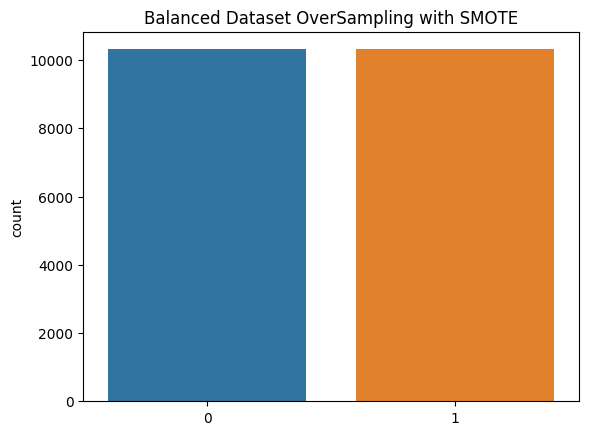

In [195]:
sns.countplot(x=y_temp).set_title('Balanced Dataset OverSampling with SMOTE')
plt.show()

In [196]:
# sns.countplot(x=y_temp1).set_title('Balanced Dataset with RandomOverSampler')
# plt.show()

In [197]:
# sns.countplot(x=y_temp2).set_title('Balanced Dataset with RandomUnderSampler')
# plt.show()

# 6. Modelling

## Build Pipelines

In [199]:
#import pipline dependencies
from sklearn.pipeline import make_pipeline        
from sklearn.preprocessing import StandardScaler

In [202]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/94/41/143e80c1f48f7e826380f382dff6caf93a698c77bf2e9e38290bbbfbfe42/xgboost-1.7.6-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00a 0:00:01


In [ ]:
from sklearn.compose import ColumnTransformer

In [203]:
# import algorithms
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [204]:
pipelines= {
    'sgd': make_pipeline(StandardScaler(), SGDClassifier()),
    'ridge': make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf': make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(),GradientBoostingClassifier()),
    'xg': make_pipeline(StandardScaler(),XGBClassifier())
}

In [211]:
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingclassifier', GradientBoostingClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingclassifier': GradientBoostingClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'log_loss',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__min_weight_fraction_leaf': 0.0,
 'gradientboostingclassifie

## Build Grids

In [218]:
grid = {
    'sgd': {
        'sgdclassifier__alpha':[0.00001, 0.0001, 0.001, 0.01]
    },
    'ridge':{
        'ridgeclassifier__alpha':[0.01, 0.5, 1.0, 2.0, 3.0]
    },
    'rf':{
        'randomforestclassifier__n_estimators':[50, 100, 200, 300],
        'randomforestclassifier__max_depth':[None, 5, 7, 9]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[50, 100, 200, 300],
        'gradientboostingclassifier__max_depth':[None, 3, 5, 7, 9]
    },
    'xg':{
        'xgbclassifier__n_estimators':[50,100,200,300],
        'xgbclassifier__max_depth':[None, 3, 5, 7, 9]
    }
}

In [216]:
# RidgeClassifier??
# RandomForestClassifier??
# GradientBoostingClassifier??
# XGBClassifier??

Init signature:
XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    use_label_encoder: Optional[bool] = None,
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 

## Train Models

In [219]:
from sklearn.model_selection import GridSearchCV

In [221]:
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(f'Commencing training for {algo}')
        # do training here
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print(f'{algo} model now trained')
    except Exception as e:
        print(f'There was an error training the {algo} model, {e}')

Commencing training for sgd
sgd model now trained
Commencing training for ridge
ridge model now trained
Commencing training for rf
rf model now trained
Commencing training for gb
gb model now trained
Commencing training for xg
xg model now trained


In [222]:
fit_models

{'sgd': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('sgdclassifier', SGDClassifier())]),
              n_jobs=-1,
              param_grid={'sgdclassifier__alpha': [1e-05, 0.0001, 0.001, 0.01]}),
 'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('ridgeclassifier', RidgeClassifier())]),
              n_jobs=-1,
              param_grid={'ridgeclassifier__alpha': [0.01, 0.5, 1.0, 2.0, 3.0]}),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier())]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__max_depth': [None, 5, 7, 9],
                          'randomforestclassifier__n_estimators':

# 7. Evaluation

## Apply Transformations to Test Data

In [223]:
col_order = X_train.columns; col_order

Index(['tenure', 'contract_length', 'remaining_term', 'last_nps_rating',
       'number_vmail_messages', 'total_day_calls', 'total_eve_calls',
       'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'total_eve_minutes_missing',
       'day_ratio', 'eve_ratio', 'night_ratio', 'intl_ratio',
       'unhappy_customers', 'state_code_AK', 'state_code_AL', 'state_code_AR',
       'state_code_AZ', 'state_code_CA', 'state_code_CO', 'state_code_CT',
       'state_code_DC', 'state_code_DE', 'state_code_FL', 'state_code_GA',
       'state_code_HI', 'state_code_IA', 'state_code_ID', 'state_code_IL',
       'state_code_IN', 'state_code_KS', 'state_code_KY', 'state_code_LA',
       'state_code_MA', 'state_code_MD', 'state_code_ME', 'state_code_MI',
       'state_code_MN', 'state_code_MO', 'state_code_MS', 'state_code_MT',
       'state_code_NC', 'state_code_ND', 'state_code_NE', 'state_code_NH',
       'state_code_NJ', 'state_code_NM', 'state_code_NV', 'state_code_NY',

In [229]:
def transform_data(test_df, col_order, mean_eve_mins, onehot):
    # copy dataframe
    X = test_df.copy()
    
    # Data preprocessing
    X['area_code'] = X['area_code'].fillna('missing')
    X['voice_mail_plan'] = X['voice_mail_plan'].fillna('missing')
    X['total_eve_minutes_missing'] = X['total_eve_minutes'].isnull().astype(int)
    X['total_eve_minutes'] = X['total_eve_minutes'].fillna(mean_eve_mins)
    
    # Feature engineering - ratios
    X['day_ratio'] = X['total_day_charge'] / X['total_day_minutes']
    X['eve_ratio'] = X['total_eve_charge'] / X['total_eve_minutes']
    X['night_ratio'] = X['total_night_charge'] / X['total_night_minutes']
    X['intl_ratio'] = X['total_intl_charge'] / X['total_intl_minutes']
    X = X.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge',
            'total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)
    
    # Feature engineering - log transform
    X['number_customer_service_calls'] = np.log(X['number_customer_service_calls']+1)
    
    # FE - Unahppy customers
    X['promotions_offered'] = X['promotions_offered'].replace(['NO',np.NaN], 'No')
    X['unhappy_customers'] = ((X.remaining_term < 5) & (X.last_nps_rating <= 7) & (X.promotions_offered == "No")).astype(int)
    
    # one hot encode
    encoded_columns = onehot.transform(X.select_dtypes(include='object')).toarray()
    X = X.select_dtypes(exclude='object')
    X[onehot.get_feature_names_out()] = encoded_columns
    
    return X[col_order]

In [225]:
test = test[~test['churn'].isnull()]

In [227]:
test.isnull().sum()

state_code                        0
tenure                            0
contract_length                   0
promotions_offered                0
remaining_term                    0
last_nps_rating                   0
area_code                         5
international_plan                0
voice_mail_plan                  10
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 6
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                             0
dtype: int64

In [230]:
X_test = transform_data(test_df=test.drop('churn', axis=1), col_order=col_order, mean_eve_mins=mean_eve_mins, onehot=onehot)

In [231]:
X_test

,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
id,,,,,,,,,,,,,,,,,,,,,
15297,75,13.0,3.0,9.0,1,121,63,97,6,1.386294,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7075,150,17.0,5.0,9.0,1,111,78,88,4,0.693147,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3733,87,11.0,6.0,9.0,2,132,95,49,2,0.693147,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
10674,110,9.0,19.0,6.0,1,85,116,90,3,0.693147,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7360,132,23.0,2.0,1.0,0,101,90,93,8,0.693147,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,44,24.0,9.0,10.0,2,71,104,113,3,1.386294,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7101,113,22.0,17.0,9.0,1,112,76,97,6,0.693147,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7062,111,22.0,24.0,9.0,16,78,121,105,8,0.693147,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [233]:
y_test = np.where(test['churn']=='yes', 1, 0)

In [235]:
y_test.sum()

741

## Evaluate Performance Metrics

In [236]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [240]:
# loop thru the models
for algo, model in fit_models.items():
    #make predictions
    y_hat=model.predict(X_test)
    # calculating metrics test partition and our predictions
    accuracy = accuracy_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    #print it out
    print(f'{algo} model scores \n\tAccuracy:{accuracy}\n\tPrecision:{precision},\n\tRecall:{recall}')
    # matrix = confusion_matrix(y_test, y_hat)
    

sgd model scores 
	Accuracy:0.8911736178467508
	Precision:0.575503355704698,
	Recall:0.9257759784075573
ridge model scores 
	Accuracy:0.8622696411251213
	Precision:0.5111430625449317,
	Recall:0.9595141700404858
rf model scores 
	Accuracy:0.9501454898157129
	Precision:0.8047858942065491,
	Recall:0.8623481781376519
gb model scores 
	Accuracy:0.950921435499515
	Precision:0.8236074270557029,
	Recall:0.8380566801619433
xg model scores 
	Accuracy:0.950921435499515
	Precision:0.840782122905028,
	Recall:0.8124156545209177


In [238]:
# recall_score??
confusion_matrix??

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Source:   
@validate_params(
    {
        "y_true": ["array-like"],
        "y_pred": ["array-like"],
        "labels": ["array-like", None],
        "sample_weight": ["array-like", None],
        "normalize": [StrOptions({"true", "pred", "all"}), None],
    },
    prefer_skip_nested_validation=True,
)
def confusion_matrix(
    y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
):
    """Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

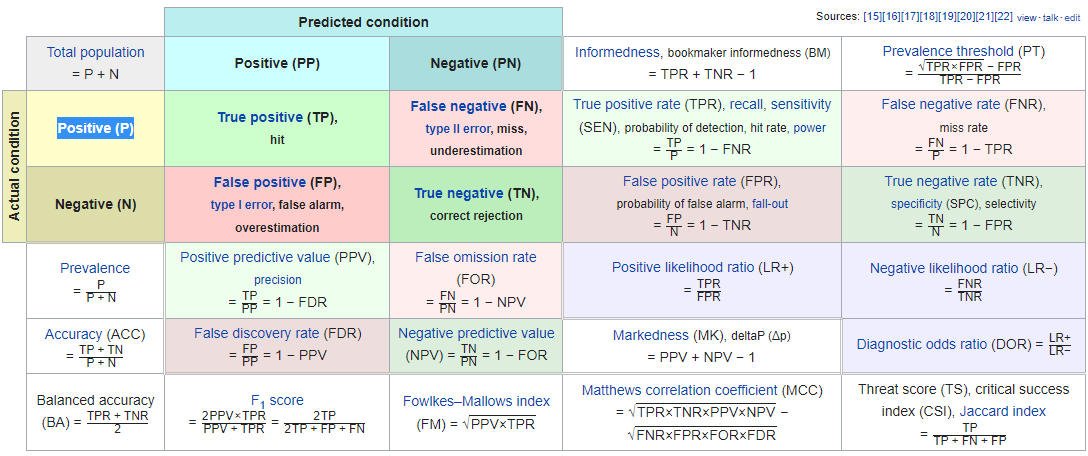

## Understanding Performance Metrics

In [ ]:
# xg model scores 
# 	Accuracy:0.950921435499515
# 	Precision:0.840782122905028,
# 	Recall:0.8124156545209177

In [241]:
model = fit_models['xg']

In [242]:
y_hat = model.predict(X_test)

In [245]:
y_hat[:50]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [247]:
confusion_matrix(y_test, y_hat, labels=[1,0])

array([[ 602,  139],
       [ 114, 4300]])

In [251]:
accuracy = (602+4300) / (602 + 4300 + 114 + 139); accuracy

0.950921435499515

In [253]:
precision = 602 /(602+114); precision

0.840782122905028

In [255]:
recall = 602 / (602 + 139); recall

0.8124156545209177

## Make a Prediction

In [262]:
res = pd.DataFrame([y_test, y_hat])
res = res.T
res.columns = ['ytrue', 'ypred']
res.head(6)

,ytrue,ypred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0


In [263]:
X_test.iloc[5]

tenure                     125.0
contract_length             16.0
remaining_term               7.0
last_nps_rating              2.0
number_vmail_messages       36.0
                           ...  
international_plan_no        1.0
international_plan_yes       0.0
voice_mail_plan_missing      0.0
voice_mail_plan_no           0.0
voice_mail_plan_yes          1.0
Name: 13546, Length: 78, dtype: float64

# 8. Deployment

## Save Models and Encoder

In [264]:
import os
import pickle

In [267]:
# CREATE FILE PATH
SAVE_PATH = os.path.join('models', 'experiment_1')
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [268]:
# SAVE MACHINE LEARNING MODELS
for algo, models in fit_models.items():
    FILE_PATH = os.path.join(SAVE_PATH, f'{algo}.pkl')
    with open(FILE_PATH, 'wb') as f:
        pickle.dump(model, f)

In [269]:
ENCODER_FILE_PATH = os.path.join(SAVE_PATH, 'encoder.pkl')
with open(ENCODER_FILE_PATH, 'wb') as f:
    pickle.dump(onehot, f)

## Create a Model Schema

In [289]:
def extract_column_values(col, df):
    if df[col].dtype == 'O':
        return list(df[col].unique())
    elif df[col].dtype == 'int64':
        return (int(df[col].min()), int(df[col].max()))
    elif df[col].dtype == 'float64':
        return (float(df[col].min()), int(df[col].max()))
    else:
        return list(df[col].unique().astype(str))

In [290]:
extract_column_values('total_eve_minutes', df)

(5.367494853, 357)

In [291]:
column_info = {col:
    {
    'dtypes':str(df[col].dtype),
    'values':extract_column_values(col, df)
    } for col in df.columns
}

In [292]:
column_info

{'state_code': {'dtypes': 'object',
  'values': ['HI',
   'MI',
   'NH',
   'MN',
   'TX',
   'WY',
   'IN',
   'IL',
   'TN',
   'MA',
   'DC',
   'NV',
   'PA',
   'AK',
   'NM',
   'WI',
   'ND',
   'NJ',
   'AR',
   'NE',
   'NY',
   'OK',
   'SD',
   'KY',
   'ID',
   'VT',
   'IA',
   'MT',
   'AL',
   'MS',
   'ME',
   'WV',
   'RI',
   'VA',
   'OH',
   'SC',
   'MD',
   'CO',
   'AZ',
   'NC',
   'CT',
   'MO',
   'UT',
   'DE',
   'WA',
   'KS',
   'CA',
   'FL',
   'LA',
   'GA',
   'OR']},
 'tenure': {'dtypes': 'int64', 'values': (1, 242)},
 'contract_length': {'dtypes': 'float64', 'values': (8.0, 24)},
 'promotions_offered': {'dtypes': 'object',
  'values': ['Yes', 'No', 'NO', nan]},
 'remaining_term': {'dtypes': 'float64', 'values': (1.0, 24)},
 'last_nps_rating': {'dtypes': 'float64', 'values': (1.0, 10)},
 'area_code': {'dtypes': 'object',
  'values': ['area_code_510', 'area_code_408', 'area_code_415', nan]},
 'international_plan': {'dtypes': 'object', 'values': ['no', 

In [293]:
transformed_cols = {'transformed_columns':X_train.columns.to_list()}
schema = {'column_info':column_info, 'transformed_columns':transformed_cols}

In [294]:
schema

{'column_info': {'state_code': {'dtypes': 'object',
   'values': ['HI',
    'MI',
    'NH',
    'MN',
    'TX',
    'WY',
    'IN',
    'IL',
    'TN',
    'MA',
    'DC',
    'NV',
    'PA',
    'AK',
    'NM',
    'WI',
    'ND',
    'NJ',
    'AR',
    'NE',
    'NY',
    'OK',
    'SD',
    'KY',
    'ID',
    'VT',
    'IA',
    'MT',
    'AL',
    'MS',
    'ME',
    'WV',
    'RI',
    'VA',
    'OH',
    'SC',
    'MD',
    'CO',
    'AZ',
    'NC',
    'CT',
    'MO',
    'UT',
    'DE',
    'WA',
    'KS',
    'CA',
    'FL',
    'LA',
    'GA',
    'OR']},
  'tenure': {'dtypes': 'int64', 'values': (1, 242)},
  'contract_length': {'dtypes': 'float64', 'values': (8.0, 24)},
  'promotions_offered': {'dtypes': 'object',
   'values': ['Yes', 'No', 'NO', nan]},
  'remaining_term': {'dtypes': 'float64', 'values': (1.0, 24)},
  'last_nps_rating': {'dtypes': 'float64', 'values': (1.0, 10)},
  'area_code': {'dtypes': 'object',
   'values': ['area_code_510', 'area_code_408', 'area_code

In [347]:
def remove_nan_values(d):
    if isinstance(d, dict):
        return {k: remove_nan_values(v) for k, v in d.items() if str(v) not in ['nan', 'NO']}
    elif isinstance(d, list):
        return [remove_nan_values(item) for item in d if str(item) not in ['nan', 'NO']]
    else:
        return d

clean_schema = remove_nan_values(schema); clean_schema

{'column_info': {'state_code': {'dtypes': 'object',
   'values': ['HI',
    'MI',
    'NH',
    'MN',
    'TX',
    'WY',
    'IN',
    'IL',
    'TN',
    'MA',
    'DC',
    'NV',
    'PA',
    'AK',
    'NM',
    'WI',
    'ND',
    'NJ',
    'AR',
    'NE',
    'NY',
    'OK',
    'SD',
    'KY',
    'ID',
    'VT',
    'IA',
    'MT',
    'AL',
    'MS',
    'ME',
    'WV',
    'RI',
    'VA',
    'OH',
    'SC',
    'MD',
    'CO',
    'AZ',
    'NC',
    'CT',
    'MO',
    'UT',
    'DE',
    'WA',
    'KS',
    'CA',
    'FL',
    'LA',
    'GA',
    'OR']},
  'tenure': {'dtypes': 'int64', 'values': (1, 242)},
  'contract_length': {'dtypes': 'float64', 'values': (8.0, 24)},
  'promotions_offered': {'dtypes': 'object', 'values': ['Yes', 'No']},
  'remaining_term': {'dtypes': 'float64', 'values': (1.0, 24)},
  'last_nps_rating': {'dtypes': 'float64', 'values': (1.0, 10)},
  'area_code': {'dtypes': 'object',
   'values': ['area_code_510', 'area_code_408', 'area_code_415']},
  'in

In [348]:
if not os.path.exists('app'):
    os.makedirs('app')

In [350]:
import json
with open(os.path.join('app','schema.json'), 'w') as f:
    json.dump(clean_schema, f)

# 9. Test Scoring

## Load Models and Encoder

In [353]:
with open(os.path.join(SAVE_PATH, 'xg.pkl'), 'rb') as f:
    model = pickle.load(f)
model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [None, 3, 5, 7, 9],
                         'xgbclassifier__n_estimators': [50, 100, 200, 300]})

In [355]:
with open(os.path.join(SAVE_PATH, 'encoder.pkl'), 'rb') as f:
    onehot_encoder = pickle.load(f)
onehot_encoder

OneHotEncoder(handle_unknown='ignore')

In [357]:
with open(os.path.join('app', 'schema.json'), 'r') as f:
    schema = json.load(f)
schema

{'column_info': {'state_code': {'dtypes': 'object',
   'values': ['HI',
    'MI',
    'NH',
    'MN',
    'TX',
    'WY',
    'IN',
    'IL',
    'TN',
    'MA',
    'DC',
    'NV',
    'PA',
    'AK',
    'NM',
    'WI',
    'ND',
    'NJ',
    'AR',
    'NE',
    'NY',
    'OK',
    'SD',
    'KY',
    'ID',
    'VT',
    'IA',
    'MT',
    'AL',
    'MS',
    'ME',
    'WV',
    'RI',
    'VA',
    'OH',
    'SC',
    'MD',
    'CO',
    'AZ',
    'NC',
    'CT',
    'MO',
    'UT',
    'DE',
    'WA',
    'KS',
    'CA',
    'FL',
    'LA',
    'GA',
    'OR']},
  'tenure': {'dtypes': 'int64', 'values': [1, 242]},
  'contract_length': {'dtypes': 'float64', 'values': [8.0, 24]},
  'promotions_offered': {'dtypes': 'object', 'values': ['Yes', 'No']},
  'remaining_term': {'dtypes': 'float64', 'values': [1.0, 24]},
  'last_nps_rating': {'dtypes': 'float64', 'values': [1.0, 10]},
  'area_code': {'dtypes': 'object',
   'values': ['area_code_510', 'area_code_408', 'area_code_415']},
  'in

## Transform Test Sample and Predict

In [359]:
df.iloc[0].to_json()

'{"state_code":"HI","tenure":156,"contract_length":14.0,"promotions_offered":"Yes","remaining_term":1.0,"last_nps_rating":6.0,"area_code":"area_code_510","international_plan":"no","voice_mail_plan":"no","number_vmail_messages":0,"total_day_minutes":167.0542167,"total_day_calls":63,"total_day_charge":29.30718149,"total_eve_minutes":231.9864949,"total_eve_calls":108,"total_eve_charge":19.13830209,"total_night_minutes":208.3499316,"total_night_calls":130,"total_night_charge":9.190181033,"total_intl_minutes":8.01568848,"total_intl_calls":7,"total_intl_charge":2.24890244,"number_customer_service_calls":7,"churn":"no"}'

In [360]:
res = {
    "state_code": "HI",
    "tenure": 156,
    "contract_length": 14.0,
    "promotions_offered": "Yes",
    "remaining_term": 1.0,
    "last_nps_rating": 6.0,
    "area_code": "area_code_510",
    "international_plan": "no",
    "voice_mail_plan": "no",
    "number_vmail_messages": 0,
    "total_day_minutes": 167.0542167,
    "total_day_calls": 63,
    "total_day_charge": 29.30718149,
    "total_eve_minutes": 231.9864949,
    "total_eve_calls": 108,
    "total_eve_charge": 19.13830209,
    "total_night_minutes": 208.3499316,
    "total_night_calls": 130,
    "total_night_charge": 9.190181033,
    "total_intl_minutes": 8.01568848,
    "total_intl_calls": 7,
    "total_intl_charge": 2.24890244,
    "number_customer_service_calls": 7
}

In [361]:
column_order_in = list(schema['column_info'].keys())[:-1]; column_order_in

['state_code',
 'tenure',
 'contract_length',
 'promotions_offered',
 'remaining_term',
 'last_nps_rating',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [362]:
column_order_out = list(schema['transformed_columns']['transformed_columns']); column_order_out

['tenure',
 'contract_length',
 'remaining_term',
 'last_nps_rating',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_eve_minutes_missing',
 'day_ratio',
 'eve_ratio',
 'night_ratio',
 'intl_ratio',
 'unhappy_customers',
 'state_code_AK',
 'state_code_AL',
 'state_code_AR',
 'state_code_AZ',
 'state_code_CA',
 'state_code_CO',
 'state_code_CT',
 'state_code_DC',
 'state_code_DE',
 'state_code_FL',
 'state_code_GA',
 'state_code_HI',
 'state_code_IA',
 'state_code_ID',
 'state_code_IL',
 'state_code_IN',
 'state_code_KS',
 'state_code_KY',
 'state_code_LA',
 'state_code_MA',
 'state_code_MD',
 'state_code_ME',
 'state_code_MI',
 'state_code_MN',
 'state_code_MO',
 'state_code_MS',
 'state_code_MT',
 'state_code_NC',
 'state_code_ND',
 'state_code_NE',
 'state_code_NH',
 'state_code_NJ',
 'state_code_NM',
 'state_code_NV',
 'state_code_NY',
 'state_code_OH',
 'state_code_OK',
 'state_co

In [363]:
scoring_data = pd.Series(res).to_frame().T
scoring_data = scoring_data[column_order_in]
scoring_data

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,...,231.986495,108,19.138302,208.349932,130,9.190181,8.015688,7,2.248902,7


In [367]:
# check dtypes
for column, column_properties in schema['column_info'].items():
    if column != 'churn':
        dtype = column_properties['dtypes']
        scoring_data[column] = scoring_data[column].astype(dtype)
scoring_data

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,...,231.986495,108,19.138302,208.349932,130,9.190181,8.015688,7,2.248902,7


In [368]:
scoring_sample = transform_data(scoring_data, column_order_out, mean_eve_mins, onehot)

In [369]:
scoring_sample

,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
0,156,14.0,1.0,6.0,0,63,108,130,7,2.079442,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [370]:
model.predict(scoring_sample)

array([0])